In [28]:
import sys
sys.path.append('/Users/ssk4/quantum-ml/dot_classifier_tf/')
import classify_tf
reload(classify_tf)

K = classify_tf.create_K_matrix(x,E_scale=0.1,sigma=0.5*(x[1] - x[0]))
#K = np.identity(len(x))
mu = 0.5
n = classify_tf.solve_thomas_fermi_fixed_mu(x,V,K,mu)
gt

def classify_n(n,tol=1e-1):
    if n < 0:
        return 'b'
    else:
        return 'd'
mask = map(classify_n,n)

islands = np.where(n > 0)
barriers = np.where(n < 0)

fig,axarr = plt.subplots(2)
axarr[0].scatter(x[islands],V[islands],color='b')
axarr[0].scatter(x[barriers],V[barriers],color='r')
axarr[0].legend(('Island','Barrier'))
axarr[0].set_xlabel('x(nm)',fontsize=16)
axarr[0].set_ylabel('V(x)',fontsize=16)
axarr[0].set_title(r'$\mu_{lead}$ = ' + str(mu[0]),fontsize=16)

ar = axarr[1].scatter(x[islands],n[islands],color='b')
ar = axarr[1].scatter(x[barriers],n[barriers],color='r')
axarr[1].legend(('Island','Barrier'))
axarr[1].set_xlabel('x(nm)',fontsize=16)
axarr[1].set_ylabel('n(x)',fontsize=16)


NameError: name 'gt' is not defined

[0]
['l1', 'l1', 'l1', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'l2', 'l2', 'l2']
[0]


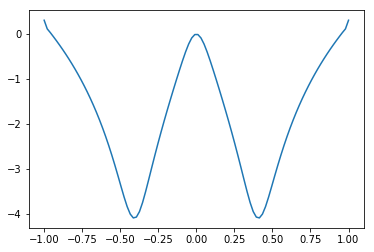

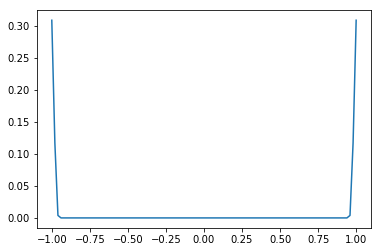

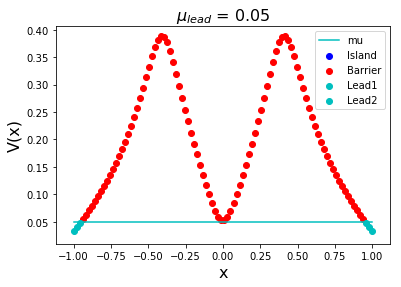

In [293]:
import numpy as np
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import potential_profile
reload(potential_profile)
import thomas_fermi
reload(thomas_fermi)

N_grid = 100
x = np.linspace(-1,1,N_grid)

d = (129e-3,0,0.10,1)
b1 = (-200e-3,-0.405,0.1,1)
b2 = (-200e-3,0.405,0.1,1)

V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)

K = dot_classifier_tf.create_K_matrix(x,E_scale=0.001,sigma=(x[1] - x[0]),x_0=(x[1]-x[0]))
#K = 0.001*np.identity(len(V))
mu = 0.05

n = dot_classifier_tf.solve_thomas_fermi_fixed_mu(x,V,K,mu)

mask = dot_classifier.get_mask(x,V,K,mu)
dot_info = dot_classifier.get_dot_info(mask)

plt.figure(1)
plt.plot(x,n)

if dot_info == {}:
    N_dot = [0]
else:
    dot_n = n[dot_info[0][0]:dot_info[0][1]+1]
    N_dot = [int(np.sum(n[dot_info[0][0]:dot_info[0][1]+1]))]
print N_dot

print mask
mu_l = (mu,mu)
n,mu = thomas_fermi.solve_thomas_fermi(x,V,K,mu_l,N_dot)
plt.figure(2)
plt.plot(x,n)

if dot_info == {}:
    N_dot = [0]
else:
    dot_n = n[dot_info[0][0]:dot_info[0][1]+1]
    N_dot = [np.sum(n[dot_info[0][0]:dot_info[0][1]+1])]
print N_dot

def plot_mask(mask,fig_no,x,V,mu_l):
    lead1 = [i for i, ele in enumerate(mask) if ele == 'l1']
    lead2 = [i for i, ele in enumerate(mask) if ele == 'l2']
    barrier = [i for i, ele in enumerate(mask) if ele == 'b']
    dot = [i for i, ele in enumerate(mask) if ele == 'd']

    plt.figure(fig_no)
    plt.scatter(x[dot],V[dot],color='b')
    plt.plot(x,mu_l[0]*np.ones(len(x)),color='c',label='mu')
    plt.scatter(x[barrier],V[barrier],color='r')
    plt.scatter(x[lead1],V[lead1],color='c')
    plt.scatter(x[lead2],V[lead2],color='c')
    plt.legend(('mu','Island','Barrier','Lead1','Lead2'))
    plt.xlabel('x',fontsize=16)
    plt.ylabel('V(x)',fontsize=16)
    plt.title(r'$\mu_{lead}$ = ' + str(mu_l[0]),fontsize=16)
    
plot_mask(mask,3,x,V,mu_l)


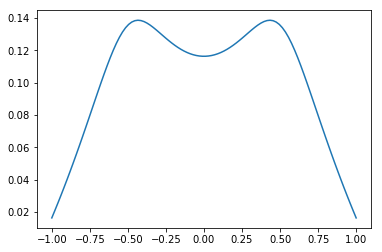

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import potential_profile
reload(potential_profile)

x = np.linspace(-1,1,100)
d = (0e-3,0,0.25,1)
b1 = (-100e-3,-0.5,0.25,1)
b2 = (-100e-3,0.5,0.25,1)

y = potential_profile.single_dot_V_x_wire(x,d,b1,b2)

plt.plot(x,y)


In [242]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import potential_profile
reload(potential_profile)

N_grid = 100
x = np.linspace(-1,1,N_grid)

N_v_points = 25
V_d_vec = np.linspace(250e-3,110e-3,N_v_points)
dot_size = np.zeros(len(V_d_vec))
for i in range(len(V_d_vec)):
    d = (V_d_vec[i],0,0.1,1)
    b1 = (-100e-3,-0.4,0.1,1)
    b2 = (-100e-3,0.4,0.1,1)

    V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)

    K = dot_classifier_tf.create_K_matrix(x,E_scale=10e-3,sigma=(x[1] - x[0]),x_0 = x[1]-x[0])
    mu = 50e-3

    mask = dot_classifier.get_mask(x,V,K,mu)
    dot_info = dot_classifier.get_dot_info(mask)
    dot_size[i] = dot_info[0][1] - dot_info[0][0]

    
    
plt.plot(V_d_vec,dot_size,'o')
plt.ylabel('Dot size')
plt.xlabel('V_d')


KeyError: 0

> <ipython-input-242-5ef35a2f06e7>(29)<module>()
     27     mask = dot_classifier.get_mask(x,V,K,mu)
     28     dot_info = dot_classifier.get_dot_info(mask)
---> 29     dot_size[i] = dot_info[0][1] - dot_info[0][0]
     30 
     31 

ipdb> p dot_info
{}
ipdb> c


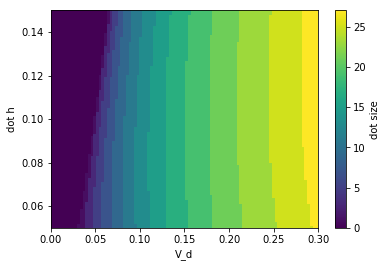

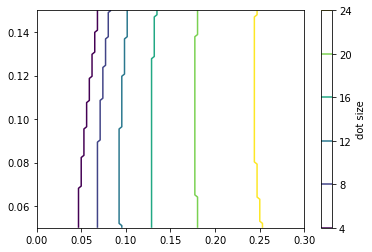

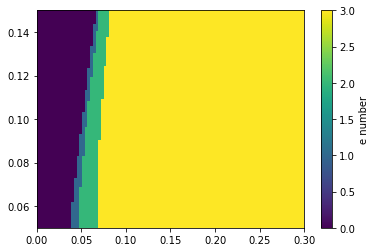

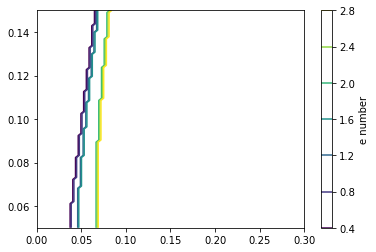

In [127]:
# dot size 2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import potential_profile
reload(potential_profile)

N_grid = 100
x = np.linspace(-1,1,N_grid)

N_v_points = 100
V_d_vec = np.linspace(0e-3,300e-3,N_v_points)

h_d_points = 100
h_d_vec = np.linspace(0.05,0.15,h_d_points)

dot_size = np.zeros((h_d_points,N_v_points))
e_number = np.zeros((h_d_points,N_v_points))
for i in range(h_d_points):
    for j in range(N_v_points):
        d = (V_d_vec[j],0,h_d_vec[i],1)
        b1 = (-100e-3,-0.3,0.1,1)
        b2 = (-100e-3,0.3,0.1,1)

        V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)

        K = dot_classifier_tf.create_K_matrix(x,E_scale=0.1e-3,sigma=(x[1] - x[0]))
        mu = 50e-3

        mask = dot_classifier.get_mask(x,V,K,mu)
        dot_info = dot_classifier.get_dot_info(mask)
        if len(dot_info) > 0:
            dot_size[i,j] = dot_info[0][1] - dot_info[0][0]
            dot_n = n[dot_info[0][0]:dot_info[0][1]]
            N_dot = int(np.sum(n[dot_info[0][0]:dot_info[0][1]]))
            e_number[i,j] = N_dot
        else:
            dot_size[i,j] = 0
            e_number[i,j] = 0
        

plt.figure(1)                  
plt.pcolor(XX,YY,dot_size)
plt.colorbar(label="dot size")
plt.xlabel('V_d')
plt.ylabel('dot h')

plt.figure(2)
plt.contour(XX,YY,dot_size)
plt.colorbar(label="dot size")

plt.figure(3)
plt.pcolor(XX,YY,e_number)
plt.colorbar(label="e number")

plt.figure(4)
plt.contour(XX,YY,e_number)
plt.colorbar(label="e number")


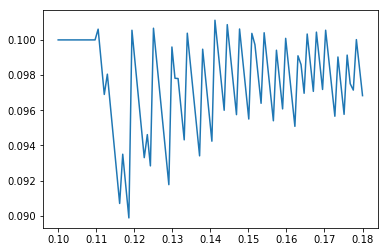

In [290]:
import numpy as np
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import potential_profile
reload(potential_profile)
import thomas_fermi
reload(thomas_fermi)

N_grid = 100
x = np.linspace(-1,1,N_grid)

N_v_points = 100
V_d_vec = np.linspace(180e-3,100e-3,N_v_points)
N_vec = np.zeros(N_v_points)
E_vec = np.zeros(N_v_points)
mu_vec = np.zeros(N_v_points)

for i in range(N_v_points):
    d = (V_d_vec[i],0,0.10,1)
    b1 = (-200e-3,-0.4,0.1,1)
    b2 = (-200e-3,0.4,0.1,1)

    V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)

    K = dot_classifier_tf.create_K_matrix(x,E_scale=0.001,sigma=(x[1] - x[0]),x_0=(x[1]-x[0]))
    #K = 0.001*np.identity(len(V))
    mu = 0.1

    n = dot_classifier_tf.solve_thomas_fermi_fixed_mu(x,V,K,mu)

    mask = dot_classifier.get_mask(x,V,K,mu)
    dot_info = dot_classifier.get_dot_info(mask)

    if dot_info == {}:
        N_dot = [0]
    else:
        dot_n = n[dot_info[0][0]:dot_info[0][1]+1]
        N_dot = [int(np.sum(n[dot_info[0][0]:dot_info[0][1]+1]))]

    mu_l = (mu,mu)
    n,mu = thomas_fermi.solve_thomas_fermi(x,V,K,mu_l,N_dot)
    N_vec[i] = N_dot[0]
    E_vec[i] = thomas_fermi.calculate_thomas_fermi_energy(V,K,n,mu,N_dot)
    mu_vec[i] = mu[1]
    
#plt.plot(V_d_vec,N_vec)
plt.plot(V_d_vec,mu_vec)